In [4]:
import pandas as pd
import re 
tweets = pd.read_csv("H:\\study\\360Digitmg\\NLP Topic Modelling and Text summerization\\airline\\Tweets.csv")

In [3]:
tweets.shape

(4999, 15)

In [6]:
HANDLE = '@\w+'
LINK = 'http?://t\.co/\w+'
SPECIAL_CHAR = '&lt;|&lt;|&amp;|#'


In [11]:
tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experie...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I didn't today... Must mean I need to take a...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"it's really aggressive to blast obnoxious ""e...",NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [8]:
def clean(text):
    text = re.sub(HANDLE," ",text)
    text = re.sub(LINK," ",text)
    text = re.sub(SPECIAL_CHAR," ",text)
    return text

In [9]:
tweets.text = tweets.text.apply(clean)

In [10]:
tweets.text

0                                            What   said.
1         plus you've added commercials to the experie...
2         I didn't today... Must mean I need to take a...
3         it's really aggressive to blast obnoxious "e...
4                and it's a really big bad thing about it
                              ...                        
4994         Promotion e-mail today (Vegas and Jamaica...
4995                               safety back in Dallas!
4996      No like I said I could not reach anyone at y...
4997      you guys are so amazing for sending people t...
4998      BTW, not a weather delay. We've had beautifu...
Name: text, Length: 4999, dtype: object

In [30]:
#LDA 
from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [17]:
#!pip install gensim

In order to speed up processing and retrieval on machine clusters, Gensim provides efficient multicore implementations of various popular algorithms like Latent Semantic Analysis (LSA), Latent Dirichlet Allocation (LDA), Random Projections (RP), Hierarchical Dirichlet Process (HDP).

In [18]:
tweets = tweets.text.apply(preprocess_string).tolist()

In [19]:
tweets

[['said'],
 ['plu', 'ad', 'commerci', 'experi', 'tacki'],
 ['todai', 'mean', 'need', 'trip'],
 ['aggress',
  'blast',
  'obnoxi',
  'entertain',
  'guest',
  'face',
  'littl',
  'recours'],
 ['big', 'bad', 'thing'],
 ['serious', 'pai', 'flight', 'seat', 'plai', 'bad', 'thing', 'fly'],
 ['ye', 'nearli', 'time', 'fly', '“ear', 'worm”', 'won’t', 'awai'],
 ['miss', 'prime', 'opportun', 'men', 'hat', 'parodi', 'http', 'mwpggrezp'],
 ['t…but'],
 ['amaz', 'arriv', 'hour', 'earli', 'good'],
 ['know', 'suicid', 'second', 'lead', 'caus', 'death', 'teen'],
 ['pretti', 'graphic', 'better', 'minim', 'iconographi'],
 ['great', 'deal', 'think', 'trip', 'haven', 'gone', 'trip'],
 ['fly', 'fabul', 'seduct', 'ski', 'stress', 'awai', 'travel'],
 ['thank'],
 ['sfo', 'pdx', 'schedul', 'mia'],
 ['excit',
  'cross',
  'countri',
  'flight',
  'lax',
  'mco',
  'heard',
  'great',
  'thing',
  'virgin',
  'america',
  'daystogo'],
 ['flew',
  'nyc',
  'sfo',
  'week',
  'couldn',
  'fulli',
  'sit',
  'seat'

In [22]:
dictionary = corpora.Dictionary(tweets)

In [24]:
corpus = [dictionary.doc2bow(text) for text in tweets]

In [25]:
corpus

[[(0, 1)],
 [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1)],
 [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1)],
 [(18, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)],
 [(22, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)],
 [(42, 1)],
 [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)],
 [(55, 1), (56, 1), (57, 1), (58, 1), (59, 1)],
 [(9, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(22, 1), (27, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1)],
 [(70, 1)],
 [(71, 1), (72, 1), (73, 1), (74, 1)],
 [(20, 1),
  (21, 1),
  (62, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(25, 1),
  (74, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  

In [26]:
Num_Topics = 5

In [27]:
ldamodel = LdaModel(corpus,num_topics=Num_Topics,id2word=dictionary,passes=10)

In [28]:
ldamodel.print_topics(num_topics=6)

[(0,
  '0.023*"flight" + 0.013*"help" + 0.013*"thank" + 0.012*"ticket" + 0.011*"minut" + 0.009*"gate" + 0.009*"work" + 0.008*"southwest" + 0.008*"travel" + 0.008*"trip"'),
 (1,
  '0.044*"thank" + 0.018*"servic" + 0.018*"bag" + 0.017*"custom" + 0.012*"check" + 0.010*"time" + 0.007*"sent" + 0.007*"unit" + 0.007*"follow" + 0.007*"us"'),
 (2,
  '0.016*"bag" + 0.016*"thank" + 0.011*"wai" + 0.010*"gui" + 0.009*"got" + 0.008*"phone" + 0.008*"help" + 0.007*"number" + 0.007*"baggag" + 0.007*"airport"'),
 (3,
  '0.027*"servic" + 0.026*"custom" + 0.026*"flight" + 0.015*"time" + 0.014*"like" + 0.013*"fly" + 0.012*"airlin" + 0.010*"know" + 0.010*"todai" + 0.009*"unit"'),
 (4,
  '0.092*"flight" + 0.025*"delai" + 0.023*"hour" + 0.022*"cancel" + 0.013*"late" + 0.013*"seat" + 0.010*"time" + 0.010*"miss" + 0.010*"flightl" + 0.010*"wait"')]

In [31]:
def cal_coherance_score(doucuments, dictionary, model):
    coherence_model = CoherenceModel(model=model,
                                     texts=doucuments,
                                     dictionary=dictionary,
                                     coherence='c_v')
    return coherence_model.get_coherence()

In [46]:
def get_coherence_val(start,stop):
    for num_of_topic in range(start,stop):
        print(f'\n calculating coherence for {num_of_topic} topics')
        ldamodel = LdaModel(corpus,id2word=dictionary,passes=2)
        coherence = cal_coherance_score(tweets,dictionary,ldamodel)
        yield coherence

In [48]:
min_topics,max_topics = 10,16

In [49]:
coherence_score = list(get_coherence_val(min_topics,max_topics))


 calculating coherence for 10 topics

 calculating coherence for 11 topics

 calculating coherence for 12 topics

 calculating coherence for 13 topics

 calculating coherence for 14 topics

 calculating coherence for 15 topics


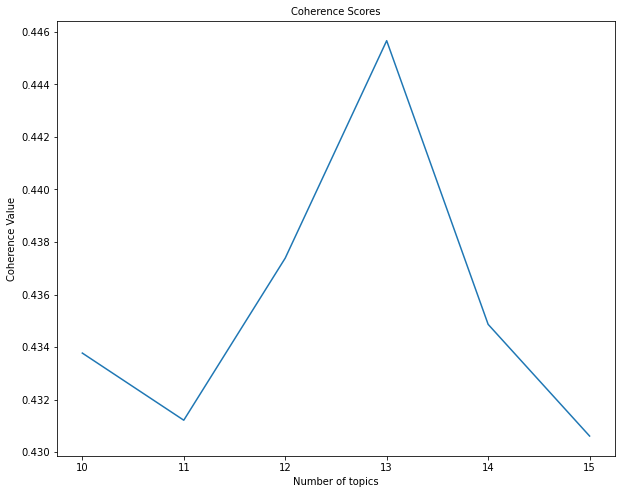

In [50]:
import matplotlib.pyplot as plt
# import matplotlib.style as style

# get_ipython().run_line_magic('matplotlib', 'auto') # will give us the plots inline only

x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(10,8))
plt.xticks(x)
plt.plot(x, coherence_score)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores', fontsize=10);